In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
titan_data = pd.read_csv('/content/drive/MyDrive/ML_Lab/train.csv')

In [3]:
titan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB






*   SibSp => Number of siblings or spouses onboard.
*   Parch => Number of Parents or children onboard.
*   C => Cherbourg
*   Q => Queenstown
*   S => Southampton

This intuitively shows that the null values are in the Age, Cabin and Embarked columns. (There are 891 entries and those features have less than 891 non-null values)

In [4]:
titan_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#Computing values to fill null entries

avg_age = round(titan_data['Age'].mean() * 2) / 2 #Original documentation notes say estimated values are in the form xx.5, this line rounds the number to the nearest 0.5
modal_cabin = titan_data['Cabin'].mode()[0]
modal_embarked = titan_data['Embarked'].mode()[0]
print(f"Average age: {avg_age},Modal cabin: {modal_cabin},Modal port of embarkation: {modal_embarked}")
values = {"Age": avg_age, "Cabin": modal_cabin, "Embarked": modal_embarked}
titan_data.fillna(value=values, inplace=True)
titan_data.info()

Average age: 29.5,Modal cabin: B96 B98,Modal port of embarkation: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This demonstrates that there are no null values present.

By inspection, Sex and Embarked are the only non-numeric categorical features.

In [6]:
#Encoding Sex and Embarked features using one-hot encoding
titan_data = pd.get_dummies(titan_data, columns=['Sex'], drop_first=True) #Using one-hot encoding to encode the sex feature
titan_data = pd.get_dummies(titan_data, columns=['Embarked']) #Using one-hot encoding to encode the embarked feature
titan_data = pd.get_dummies(titan_data, columns=['Pclass']) #Using one-hot encoding to encode the Pclass feature
titan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Sex_male     891 non-null    bool   
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
 13  Pclass_1     891 non-null    bool   
 14  Pclass_2     891 non-null    bool   
 15  Pclass_3     891 non-null    bool   
dtypes: bool(7), float64(2), int64(4), object(3)
memory usage: 68.9+ KB


In [7]:
#Normalising Age, Fare, SibSp, and Parch
scaler = StandardScaler() #StandardScaler transforms the features to have zero mean and unit variance, bringing them to a standard range.
titan_data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(titan_data[['Age', 'Fare', 'SibSp', 'Parch']])
titan_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",-0.589426,0.432793,-0.473674,A/5 21171,-0.502445,B96 B98,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.641821,0.432793,-0.473674,PC 17599,0.786845,C85,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",-0.281614,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,B96 B98,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.410962,0.432793,-0.473674,113803,0.420730,C123,False,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",0.410962,-0.474545,-0.473674,373450,-0.486337,B96 B98,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",-0.204661,-0.474545,-0.473674,211536,-0.386671,B96 B98,True,False,False,True,False,True,False
887,888,1,"Graham, Miss. Margaret Edith",-0.820284,-0.474545,-0.473674,112053,-0.044381,B42,False,False,False,True,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",-0.012279,0.432793,2.008933,W./C. 6607,-0.176263,B96 B98,False,False,False,True,False,False,True
889,890,1,"Behr, Mr. Karl Howell",-0.281614,-0.474545,-0.473674,111369,-0.044381,C148,True,True,False,False,True,False,False


In [8]:
titan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Sex_male     891 non-null    bool   
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
 13  Pclass_1     891 non-null    bool   
 14  Pclass_2     891 non-null    bool   
 15  Pclass_3     891 non-null    bool   
dtypes: bool(7), float64(4), int64(2), object(3)
memory usage: 68.9+ KB


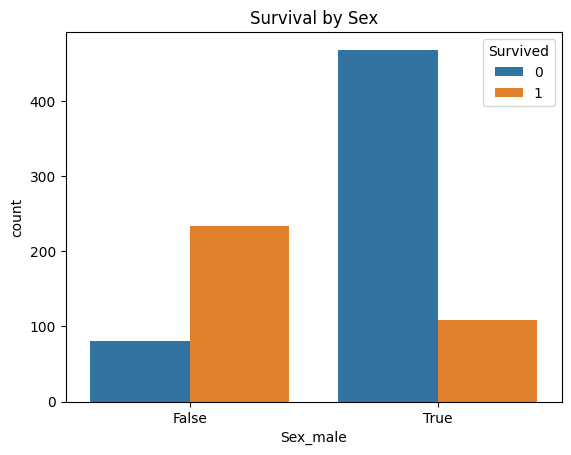

In [9]:
#survival by sex
sns.countplot(data=titan_data, x='Sex_male', hue='Survived')
plt.title('Survival by Sex')
plt.show()

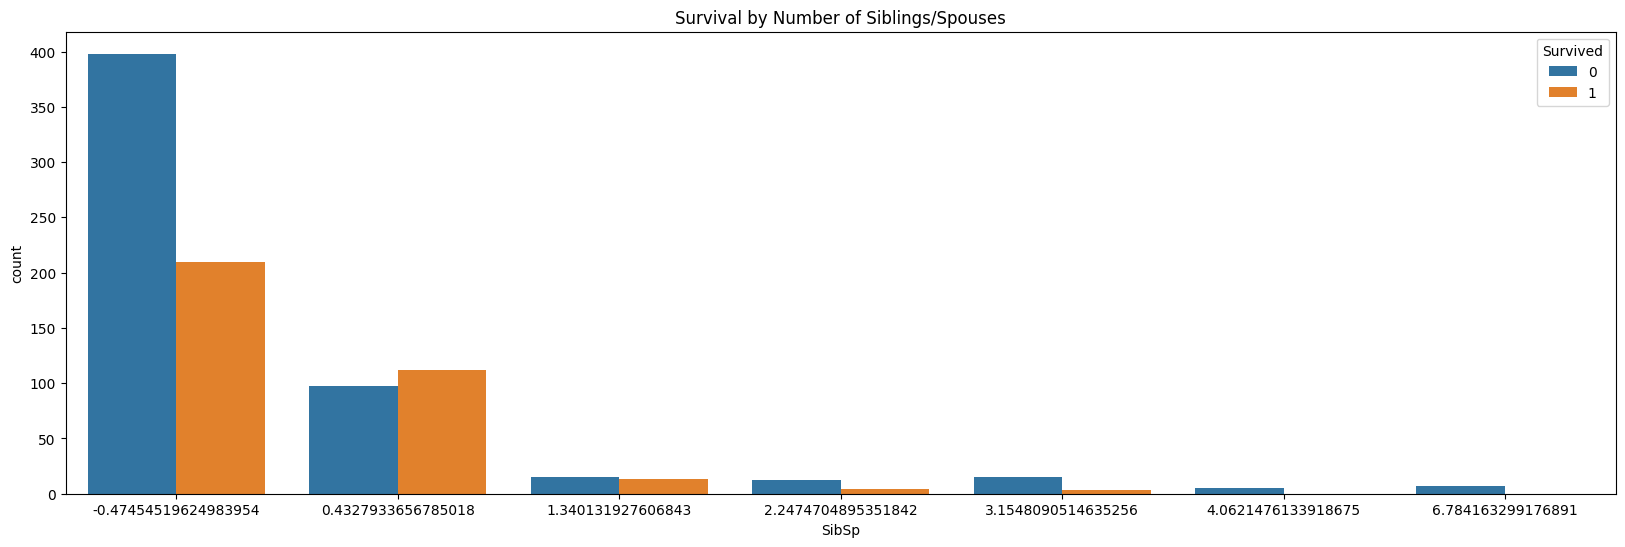

In [10]:
#survival by SibSp
plt.figure(figsize=(20, 6))
sns.countplot(data=titan_data, x='SibSp', hue='Survived')
plt.title('Survival by Number of Siblings/Spouses')
plt.show()

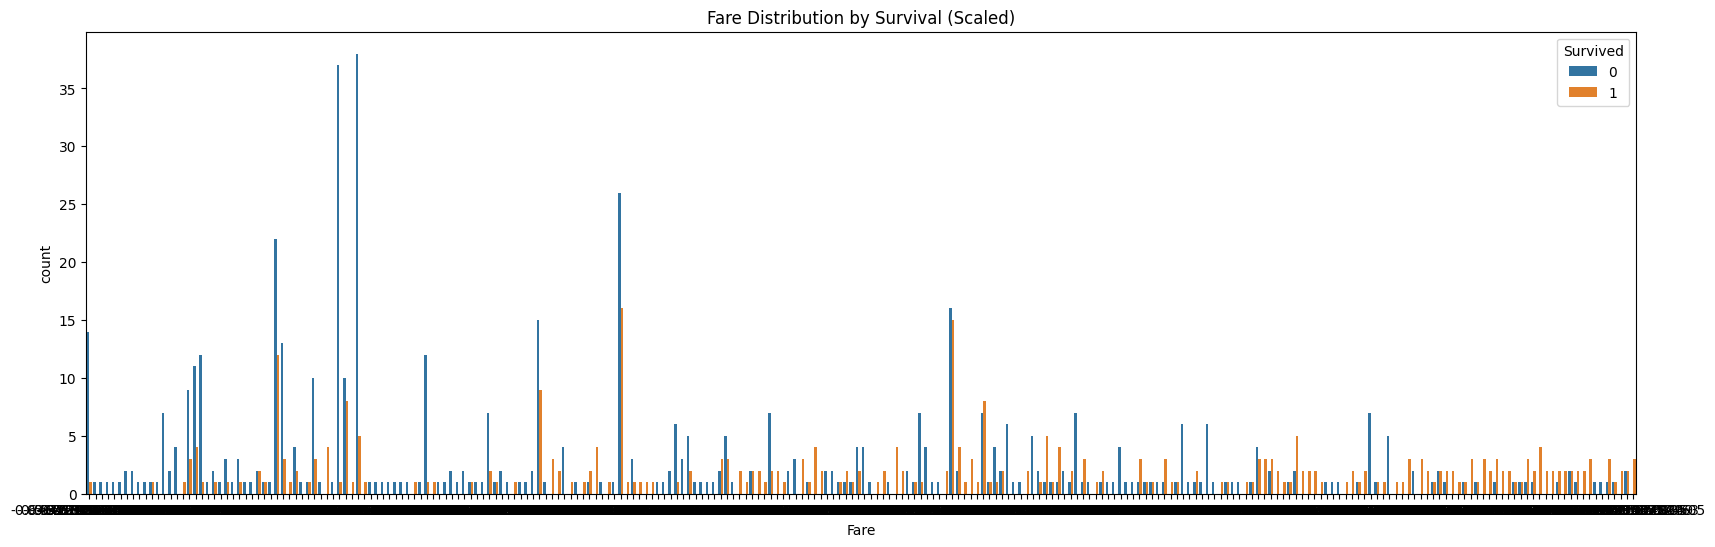

In [11]:
#by fare
plt.figure(figsize=(20, 6))
sns.countplot(data=titan_data, hue='Survived', x='Fare')
plt.title('Fare Distribution by Survival (Scaled)')
plt.show()

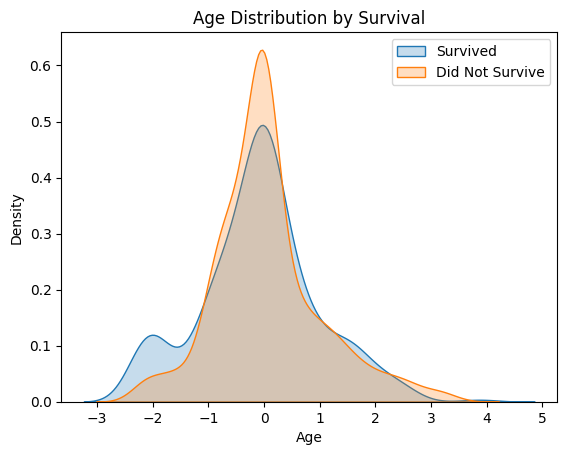

In [12]:
#by age
sns.kdeplot(data=titan_data[titan_data['Survived'] == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=titan_data[titan_data['Survived'] == 0], x='Age', label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

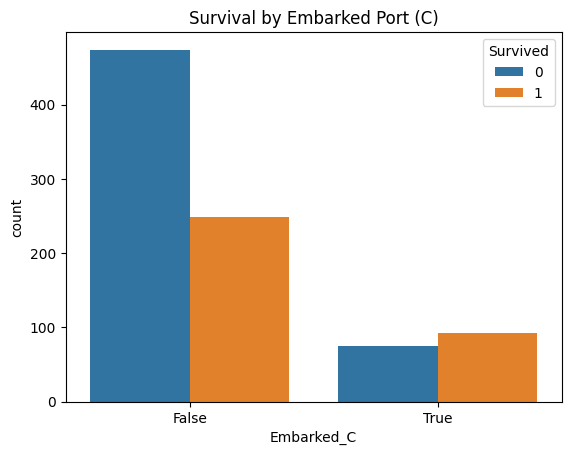

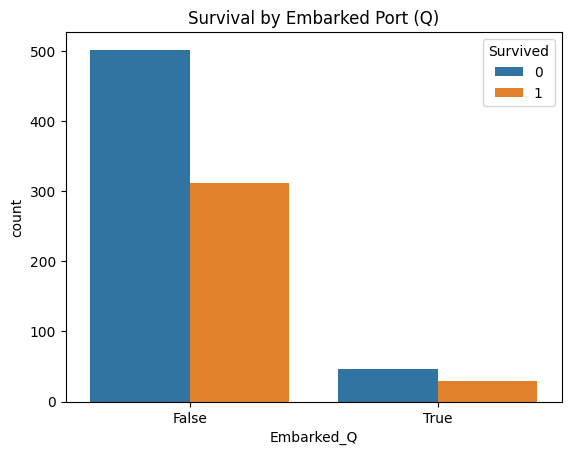

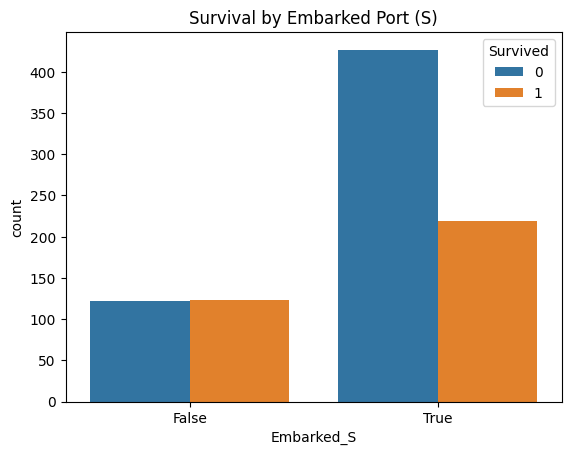

In [13]:
#Embarked visualisation
sns.countplot(data=titan_data, x='Embarked_C', hue='Survived')
plt.title('Survival by Embarked Port (C)')
plt.show()

sns.countplot(data=titan_data, x='Embarked_Q', hue='Survived')
plt.title('Survival by Embarked Port (Q)')
plt.show()

sns.countplot(data=titan_data, x='Embarked_S', hue='Survived')
plt.title('Survival by Embarked Port (S)')
plt.show()

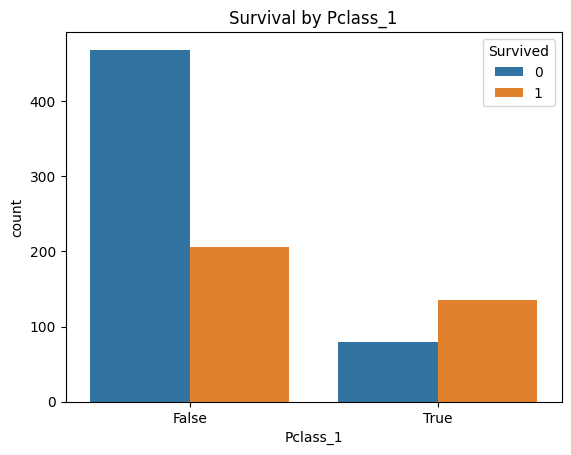

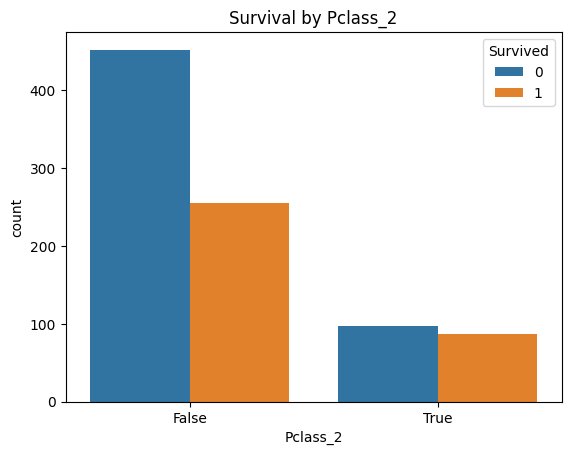

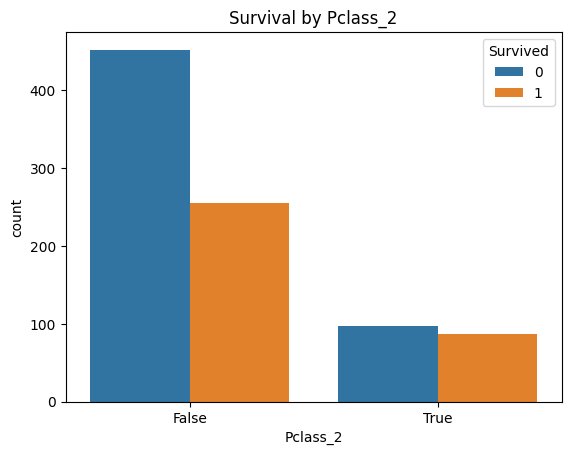

In [14]:
#Pclass visualisation
sns.countplot(data=titan_data, x='Pclass_1', hue='Survived')
plt.title('Survival by Pclass_1')
plt.show()

sns.countplot(data=titan_data, x='Pclass_2', hue='Survived')
plt.title('Survival by Pclass_2')
plt.show()

sns.countplot(data=titan_data, x='Pclass_2', hue='Survived')
plt.title('Survival by Pclass_2')
plt.show()

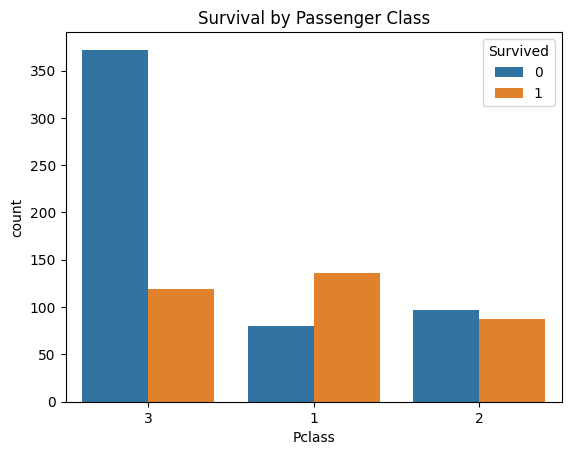

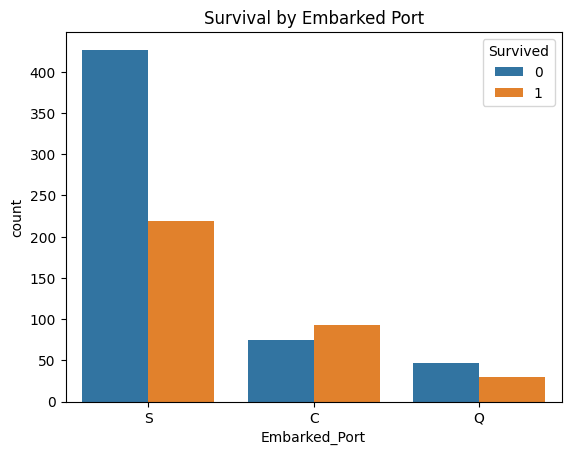

In [15]:
#Combining enconded features for visualisation
titan_data['Pclass'] = '3'
titan_data.loc[titan_data['Pclass_1'] == 1, 'Pclass'] = '1'
titan_data.loc[titan_data['Pclass_2'] == 1, 'Pclass'] = '2'

sns.countplot(data=titan_data, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

titan_data['Embarked_Port'] = 'S'  # Default to port 'S'
titan_data.loc[titan_data['Embarked_C'] == 1, 'Embarked_Port'] = 'C'
titan_data.loc[titan_data['Embarked_Q'] == 1, 'Embarked_Port'] = 'Q'

sns.countplot(data=titan_data, x='Embarked_Port', hue='Survived')
plt.title('Survival by Embarked Port')
plt.show()